<a href="https://colab.research.google.com/github/DJLee68/MachineLearningProject/blob/master/Assignment09/DJLee_Assignment09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torch.nn as nn
from torchvision import transforms, utils, datasets
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])

data_path = './MNIST'

train_data = datasets.MNIST(root = data_path, train= True, download=True, transform= transform)
test_data = datasets.MNIST(root = data_path, train= False, download=True, transform= transform)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
 class Classification(nn.Module):
    def __init__(self):
        super(Classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out


In [3]:
lr=0.0001

criterion = nn.NLLLoss()
classification = Classification().to(device)
optimizer = torch.optim.SGD(classification.parameters(), lr=lr)

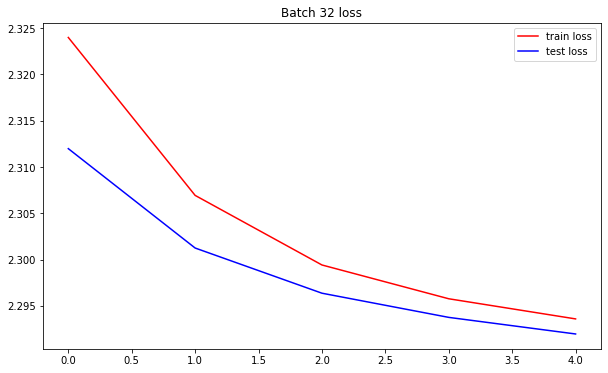

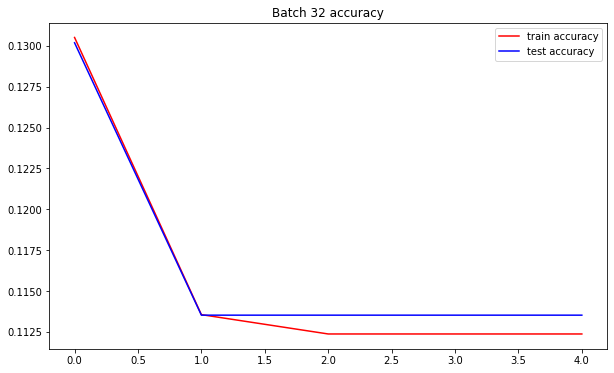

In [4]:
def run_epoch (train_data, test_data):
    
    tr_loss = 0
    tr_acc = 0
    iter = len(train_data)
    
    for img_i, label_i in train_data: #{
        correct = 0
        img_i, label_i = img_i.to(device), label_i.to(device)

        optimizer.zero_grad()
        # Forward
        y_pred = classification.forward(img_i.view(-1, 28*28))
        _, predict = torch.max(y_pred, 1)
        correct += (predict == label_i).sum().item()
        # Loss computation
        loss  = criterion(y_pred, label_i)
        # Backward
        loss.backward()
        # Optimize for img_i
        optimizer.step()
        tr_loss += loss.item()
        tr_acc += correct / len(img_i)
    #}
    tr_loss /= iter
    tr_acc /= iter
    
    test_loss = 0
    test_acc = 0
    iter_test = len(test_data)
    
    for img_j, label_j in test_data:
        img_j, label_j = img_j.to(device), label_j.to(device)
        correct = 0
        with torch.autograd.no_grad():
            predicted = classification.forward(img_j.view(-1, 28*28))
            test_loss += criterion(predicted, label_j).item()
            _, predict = torch.max(predicted, 1)
            correct += (predict == label_j).sum().item()
            test_acc += correct / len(img_j)
    
    test_loss /= iter_test
    test_acc /= iter_test
    return tr_loss, tr_acc, test_loss, test_acc

def run(batch_size, epochs): #{
  train_data_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle=False)
  test_data_loader  = torch.utils.data.DataLoader(test_data, batch_size, shuffle=False)
  mini_batch_data, mini_batch_label  = next(iter(train_data_loader))
  
  train_loss = []
  test_loss = []
  train_acc = []
  test_acc = []

  for epoch in range(epochs): #{
    tr_loss, tr_acc, te_loss, te_acc = run_epoch(train_data_loader, test_data_loader)
    train_loss.append(tr_loss)
    train_acc.append(tr_acc)
    test_loss.append(te_loss)
    test_acc.append(te_acc)
  #}
  return train_loss, test_loss, train_acc, test_acc
#}

train_loss, test_loss, train_acc, test_acc = run(32, 5)
plt.figure(0, figsize=(10,6))
plt.plot(train_loss, label='train loss', c='r')
plt.plot(test_loss, label='test loss', c='b')
plt.title('Batch 32 loss')
plt.legend()
plt.show()

plt.figure(1, figsize=(10,6))
plt.plot(train_acc, label='train accuracy', c='r')
plt.plot(test_acc, label='test accuracy', c='b')
plt.title('Batch 32 accuracy')
plt.legend()
plt.show()

In [5]:
print(torch.cuda.device_count)

<function device_count at 0x7f15c9d99378>


In [6]:
model = classification()

for i in range(10): #{
  y_pred = model.forward()    
#}

TypeError: ignored

## Output using the dataset

1. Plot the original data points [1pt]

2. Plot the normalized data points [1pt]

3. Plot the principal axes [2pt]

4. Plot the first principal axis [3pt]

5. Plot the project of the normalized data points onto the first principal axis [4pt]

6. Plot the lines between the normalized data points and their projection points on the first principal axis [3pt]



7. Plot the second principal axis [3pt]

8. Plot the project of the normalized data points onto the second principal axis [4pt]

9. Plot the lines between the normalized data points and their projection points on the second principal axis [3pt]